# Python Data Mining Quick Start Guide
## Ch 5 - Grouping and Clustering Data
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 

This chapter is a heavily conceptual one. The conceptual descriptions are not copied to the notebook, only the code. 

In [1]:
# initial imports
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("paper", font_scale=1.5)
sns.set_style("white")

## Clustering Methods

The clustering methods in Scikit-learn have a nice congruent usage that for the most part matches the below pseudocode across all the algorithms:

In [2]:
### this is pseudocode. it will not execute ###
# import module and instantiate method object
from sklearn.cluster import Method
clus = Method(args*)

# fit to input data
clus.fit(X_input)

# get cluster assignments of X_input
X_assigned = clus.labels_

SyntaxError: invalid syntax (<ipython-input-2-330d8af3517a>, line 4)

### Studying Clustering Output to Build Intuitions
The rest of this chapter will cover some common methods used for data clustering. Below is a group of plots comparing different cluster methods and how they assign data points into groups: 

TIP: Execute the next cell. Then take a minute to study the "Comparing Cluster Methods" figure and look for any qualitative trends or patterns before reading the following sections. Your goal should be to read the rest of the chapter looking for validation of your qualitative pattern recognition. Trust me, if you take this approach you will gain intuition quickly.  

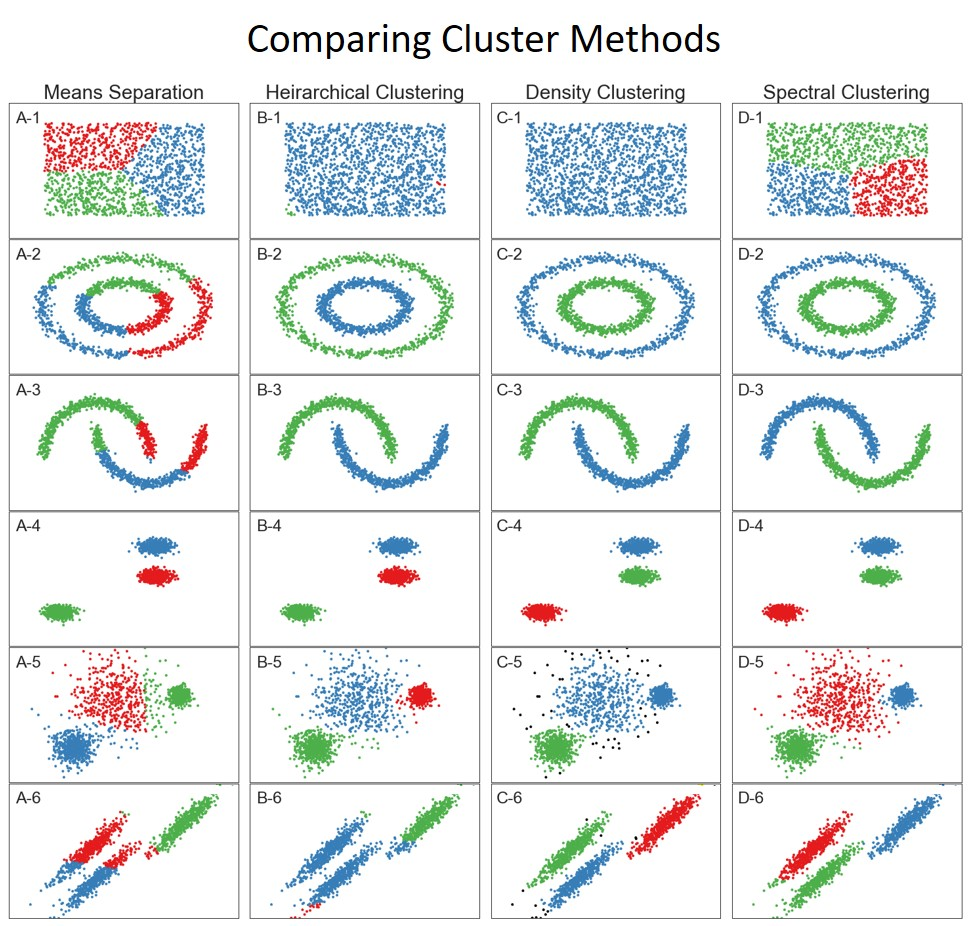

In [3]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/compare_clsuter_methods.jpg")

Lets build a function that creates a demonstration dataset of blobs for clustering examples. You can call this function and use the resulting set of blobs set of blobs to run the code in the rest of the chapter:

        Feature_1  Feature_2
record                      
0       11.492294 -10.236187
1        4.376245  -9.152790
2       -2.193675   3.212265
3       -2.976039   3.037043
4       -2.963703   2.336960


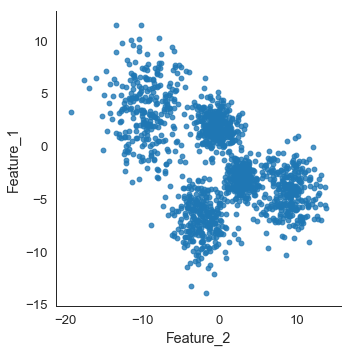

In [4]:
# import datasets module from Sci-kit learn
from sklearn import datasets

# function to create data for clustering examples
def make_blobs():
    # build blobs for demonstration
    n_samples = 1500
    blobs = datasets.make_blobs(n_samples=n_samples,
                                 centers=5,
                                 cluster_std=[3.0, 0.9, 1.9, 1.9, 1.3],
                                 random_state=51)
    
    # create a Pandas dataframe for the data
    df = pd.DataFrame(blobs[0], columns=['Feature_1', 'Feature_2'])
    df.index.name = 'record'
    return df

df = make_blobs()
print(df.head())

# plot scatter of blob set
sns.lmplot(x='Feature_2', y='Feature_1', 
           data=df, fit_reg=False)

## Means Separation

### K-means 

In [5]:
# generate blob example dataset
df = make_blobs()

# import module and instantiate K-means object
from sklearn.cluster import KMeans
clus = KMeans(n_clusters=5, tol=0.004, max_iter=300)

# fit to input data
clus.fit(df)

# get cluster assignments of input data and print first five labels
df['K-means Cluster Labels'] = clus.labels_
print(df['K-means Cluster Labels'][:5].tolist())

df.head()

[0, 0, 1, 1, 1]


,Feature_1,Feature_2,K-means Cluster Labels
record,,,
0,11.492294,-10.236187,0
1,4.376245,-9.152790,0
2,-2.193675,3.212265,1
3,-2.976039,3.037043,1
4,-2.963703,2.336960,1


Now let's plot the blob set with the cluster labels displayed:

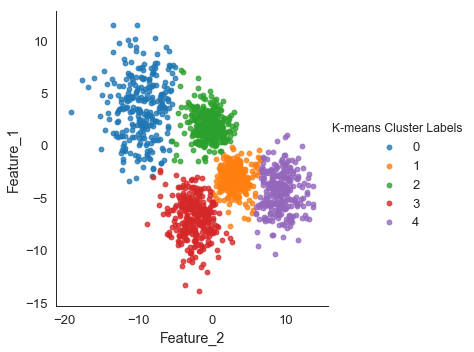

In [6]:
sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="K-means Cluster Labels", data=df, fit_reg=False)

### Finding _k_

In [7]:
# generate blob example dataset
df = make_blobs()

# find best value for k using silhouette score
# import metrics module
from sklearn import metrics

# create list of k values to test and then use for loop
n_clusters = [2,3,4,5,6,7,8]
for k in n_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(df)
    cluster_labels = kmeans.predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(k, S))

n_clusters = 2, silhouette score 0.442473
n_clusters = 3, silhouette score 0.442798
n_clusters = 4, silhouette score 0.513624
n_clusters = 5, silhouette score 0.547875
n_clusters = 6, silhouette score 0.524818
n_clusters = 7, silhouette score 0.523139
n_clusters = 8, silhouette score 0.486676


### K-means++

In [8]:
# instantiate k-means object with k-means++ init method
clus = KMeans(n_clusters=5, init='k-means++',
              tol=0.004, max_iter=300)

### Mini Batch K-means

In [9]:
# import module and instantiate k-means mini batch object
from sklearn.cluster import MiniBatchKMeans
clus = MiniBatchKMeans(n_clusters=5, batch_size=50,
                        tol=0.004, max_iter=300)

## Hierarchical Clustering

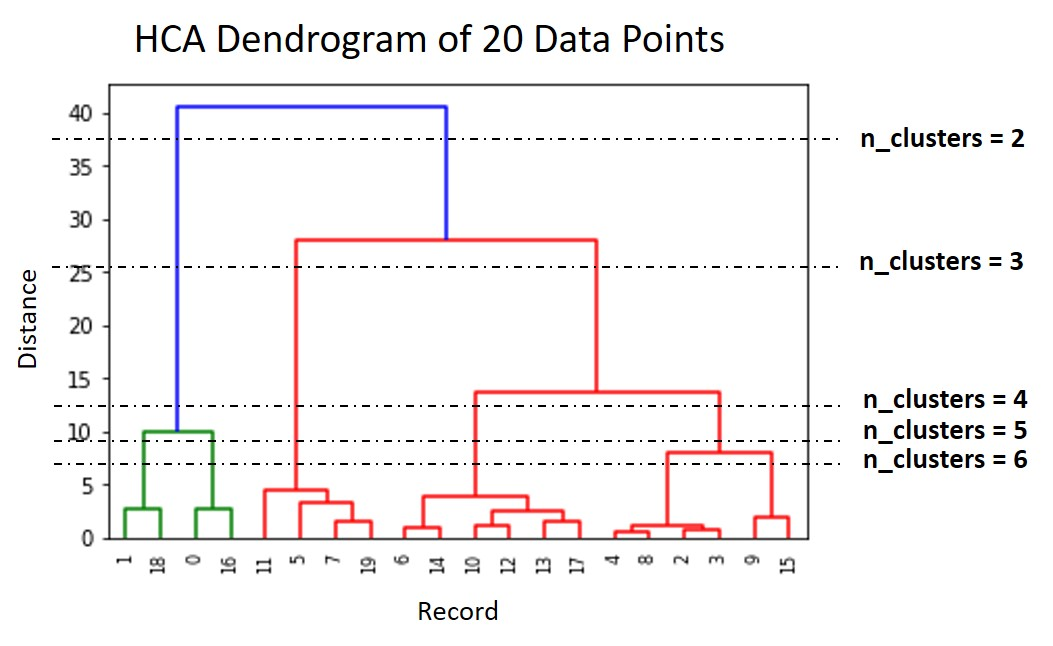

In [10]:
# execute this cell to show the image
from IPython.display import Image
Image("./images/hca_dendrogram.jpg")

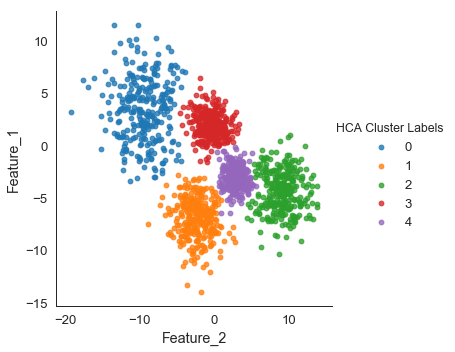

In [11]:
# generate blob example dataset
df = make_blobs()

# import module and instantiate HCA object
from sklearn.cluster import AgglomerativeClustering
clus = AgglomerativeClustering(n_clusters=5, 
                               affinity='euclidean', linkage='ward')

# fit to input data
clus.fit(df)

# get cluster assignments
df['HCA Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="HCA Cluster Labels", data=df, fit_reg=False)


In [12]:
# find optimal number of clusters using silhouette score
# import metrics module
from sklearn import metrics

# generate blob example dataset
df = make_blobs()

# import module and instantiate HCA object
from sklearn.cluster import AgglomerativeClustering

# create list of k values to test and then use for loop
n_clusters = [2,3,4,5,6,7,8]
for num in n_clusters:
    HCA = AgglomerativeClustering(n_clusters=num, 
                               affinity='euclidean', linkage='ward',
                               memory='./model_storage/dendrogram', 
                               compute_full_tree=True)
    cluster_labels= HCA.fit_predict(df)
    S = metrics.silhouette_score(df, cluster_labels)
    print("n_clusters = {:d}, silhouette score {:1f}".format(num, S))

n_clusters = 2, silhouette score 0.491869
n_clusters = 3, silhouette score 0.445017
n_clusters = 4, silhouette score 0.514050
n_clusters = 5, silhouette score 0.540089
n_clusters = 6, silhouette score 0.512037
n_clusters = 7, silhouette score 0.506730
n_clusters = 8, silhouette score 0.476728


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [92.5, 92.5, 120.0, 120.0],
  [70.0, 70.0, 106.25, 106.25],
  [55.0, 55.0, 88.125, 88.125],
  [32.5, 32.5, 71.5625, 71.5625],
  [10.0, 10.0, 52.03125, 52.03125],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [135.0, 135.0, 152.5, 152.5],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [143.75, 143.75, 184.375, 184.375],
  [255.0, 255.0, 265.0, 265.0],
  [245.0, 245.0, 260.0, 260.0],
  [235.0, 235.0, 252.5, 252.5],
  [225.0, 225.0, 243.75, 243.75],
  [164.0625, 164.0625, 234.375, 234.375],
  [31.015625, 31.015625, 199.21875, 199.21875],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 32

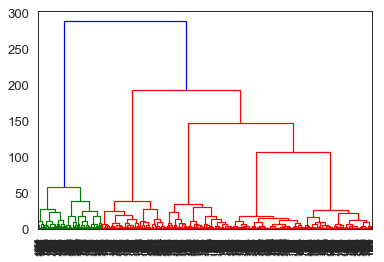

In [13]:
# import scipy module
from scipy.cluster import hierarchy

# Calculate the distance between each sample
Z = hierarchy.linkage(df, 'ward') 
 
# Plot with Custom leaves (scroll down in console to see plot)
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8, labels=df.index)

## Density Clustering

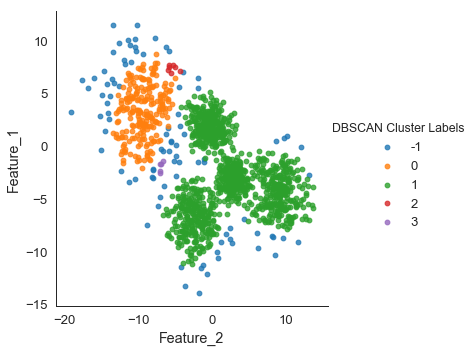

In [14]:
# generate blob example dataset
df = make_blobs()

# import module and instantiate DBSCAN object
from sklearn.cluster import DBSCAN
clus = DBSCAN(eps=0.9, min_samples=5, metric='euclidean')

# fit to input data
clus.fit(df)

# get cluster assignments
df['DBSCAN Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="DBSCAN Cluster Labels", data=df, fit_reg=False)

## Spectral Clustering

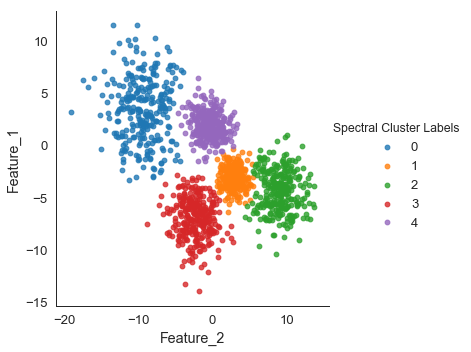

In [15]:
# generate blob example dataset
df = make_blobs()

# import module and instantiate spectral clustering object
from sklearn.cluster import SpectralClustering
clus = SpectralClustering(n_clusters=5, random_state=42, 
                          assign_labels='kmeans', n_init=10,
                          affinity='nearest_neighbors', n_neighbors=10)

# fit to input data
clus.fit(df)

# get cluster assignments
df['Spectral Cluster Labels'] = clus.labels_

sns.lmplot(x='Feature_2', y='Feature_1', 
           hue="Spectral Cluster Labels", data=df, fit_reg=False)